In [1]:
# %cd /content/drive/MyDrive/Colab Notebooks/fastai-practice

# !git config --global user.email 'intaek428@gmail.com'
# !git config --global user.name 'ITHwang'

# !git add .
# !git commit -m '4.4.1까지'
# !git push

!pip install -Uqq fastbook
# !pip install fastai --upgrade

     |████████████████████████████████| 720 kB 5.2 MB/s 
     |████████████████████████████████| 189 kB 35.5 MB/s 
     |████████████████████████████████| 1.2 MB 37.2 MB/s 
     |████████████████████████████████| 48 kB 4.3 MB/s 
     |████████████████████████████████| 56 kB 3.1 MB/s 
     |████████████████████████████████| 558 kB 37.1 MB/s 
     |████████████████████████████████| 51 kB 256 kB/s 
     |████████████████████████████████| 130 kB 31.4 MB/s 


In [2]:
import fastbook
# fastbook.setup_book() # to connect the colab notebook to google drive using an authentication token
from fastai.vision.all import *

In [3]:
import numpy as np

In [4]:
data = [[1,2,3,],[4,5,6]]
arr = array(data)
tns = tensor(data)

arr

array([[1, 2, 3],
       [4, 5, 6]])

In [5]:
tns

tensor([[1, 2, 3],
        [4, 5, 6]])

In [6]:
tns.type()

'torch.LongTensor'

In [7]:
path = untar_data(URLs.MNIST_SAMPLE)
path.ls()

(#3) [Path('/root/.fastai/data/mnist_sample/train'),Path('/root/.fastai/data/mnist_sample/valid'),Path('/root/.fastai/data/mnist_sample/labels.csv')]

In [8]:
from PIL import Image

In [9]:
threes_t = (path/'train'/'3').ls().sorted()
sevens_t = (path/'train'/'7').ls().sorted()
three_tensors_t = [tensor(Image.open(o)) for o in threes_t]
seven_tensors_t = [tensor(Image.open(o)) for o in sevens_t]
stacked_threes_t = torch.stack(three_tensors_t).float() / 255
stacked_sevens_t = torch.stack(seven_tensors_t).float() / 255

threes_v = (path/'valid'/'3').ls().sorted()
sevens_v = (path/'valid'/'7').ls().sorted()
three_tensors_v = [tensor(Image.open(o)) for o in threes_v]
seven_tensors_v = [tensor(Image.open(o)) for o in sevens_v]
stacked_threes_v = torch.stack(three_tensors_v).float() / 255
stacked_sevens_v = torch.stack(seven_tensors_v).float() / 255

mean3 = stacked_threes_t.mean(0)
mean7 = stacked_sevens_t.mean(0)

In [10]:
# mean absolute difference
def mnist_distance(a, b): return (a - b).abs().mean((-1, -2))

In [11]:
a_3 = stacked_threes_t[1]
mnist_distance(a_3, mean3)

tensor(0.1114)

In [12]:
# use broadcasting
valid_3_dist = mnist_distance(stacked_threes_v, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1280, 0.1623, 0.1242,  ..., 0.1508, 0.1263, 0.1260]),
 torch.Size([1010]))

In [13]:
def is_3(x): return mnist_distance(x, mean3) < mnist_distance(x, mean7)
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

In [14]:
accuracy_3s = is_3(stacked_threes_v).float().mean()
accuracy_7s = (1 - is_3(stacked_sevens_v).float()).mean()
(accuracy_3s + accuracy_7s) / 2

tensor(0.9511)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Not providing a value for linspace's steps is deprecated and will throw a runtime error in a future release. This warning will appear only once per process. (Triggered internally at  ../aten/src/ATen/native/RangeFactories.cpp:23.)
  


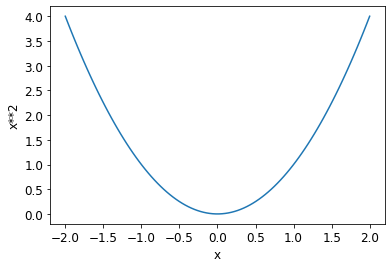

In [15]:
import matplotlib.pyplot as plt

def f(x): return x**2

def plot_function(f, tx=None, ty=None, title=None, min=-2, max=2, figsize=(6,4)):
    x = torch.linspace(min,max)
    fig,ax = plt.subplots(figsize=figsize)
    ax.plot(x,f(x))
    if tx is not None: ax.set_xlabel(tx)
    if ty is not None: ax.set_ylabel(ty)
    if title is not None: ax.set_title(title)
    
plot_function(f, 'x', 'x**2')

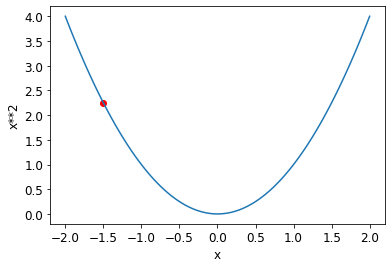

In [16]:
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(-1.5), color='red')


In [17]:
xt = tensor(3.).requires_grad_()
yt = f(xt)
yt.backward()

In [18]:
xt.grad

tensor(6.)

In [19]:
time = torch.arange(0, 20).float();
time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

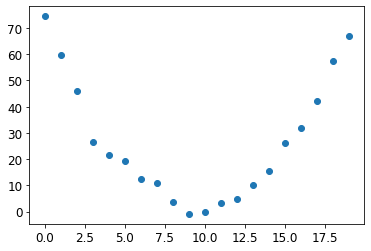

In [20]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time, speed)

In [21]:
def mse(preds, targets): return ((preds-targets)**2).mean().sqrt()

In [22]:
params = torch.randn(3).requires_grad_()

In [23]:
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

In [24]:
preds = f(time, params)

In [25]:
def show_preds(preds, ax=None):
    if ax is None: ax = plt.subplots()[1]
    ax.scatter(time, speed) # speed was defined
    ax.scatter(time, to_np(preds), color='red')
    # ax.set_ylim(-300, 100)


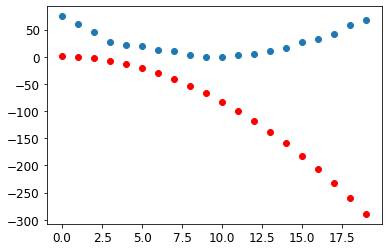

In [26]:
show_preds(preds)

In [27]:
loss = mse(preds, speed)
loss

tensor(160.6979, grad_fn=<SqrtBackward0>)

In [28]:
loss.backward()
params.grad

tensor([-165.5151,  -10.6402,   -0.7900])

In [29]:
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None
params 

tensor([-0.7642, -0.7505,  1.3526], requires_grad=True)

In [30]:
# 두 번째 학습
preds = f(time, params)
mse(preds, speed)

tensor(160.4228, grad_fn=<SqrtBackward0>)

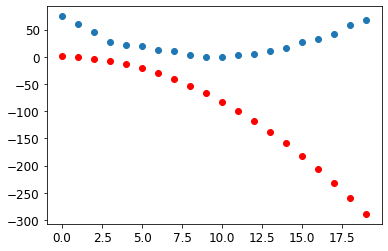

In [31]:
show_preds(preds)

In [32]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn:
        print(type(loss)) 
        print(loss.item())
    return preds

In [33]:
for i in range(10): apply_step(params)

<class 'torch.Tensor'>
160.42279052734375
<class 'torch.Tensor'>
160.14772033691406
<class 'torch.Tensor'>
159.87269592285156
<class 'torch.Tensor'>
159.59768676757812
<class 'torch.Tensor'>
159.3227081298828
<class 'torch.Tensor'>
159.04774475097656
<class 'torch.Tensor'>
158.7728271484375
<class 'torch.Tensor'>
158.4979248046875
<class 'torch.Tensor'>
158.22305297851562
<class 'torch.Tensor'>
157.9481964111328


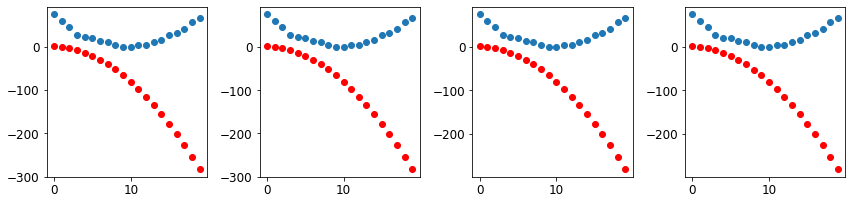

In [34]:
_, axs = plt.subplots(1, 4, figsize=(12, 3))
for ax in axs: 
    show_preds(apply_step(params, False), ax)
plt.tight_layout()

In [35]:
train_x = torch.cat([stacked_threes_t, stacked_sevens_t])
train_x.shape

torch.Size([12396, 28, 28])

In [36]:
train_x = train_x.view(-1, 28*28)
train_x.shape

torch.Size([12396, 784])

In [37]:
train_y = tensor([1]*len(threes_t) + [0]*len(sevens_t)).unsqueeze(1)
train_y

tensor([[1],
        [1],
        [1],
        ...,
        [0],
        [0],
        [0]])

In [38]:
dset = list(zip(train_x, train_y))
x, y = dset[0]
x.shape, y

(torch.Size([784]), tensor([1]))

In [39]:
valid_x = torch.cat([stacked_threes_v, stacked_sevens_v]).view(-1, 28*28)
valid_y = tensor([1]*len(threes_v) + [0]*len(sevens_v)).unsqueeze(1)
valid_dset = list(zip(valid_x, valid_y))

In [40]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()
weights = init_params((28*28, 1))
bias = init_params(1)

In [41]:
bias.shape

torch.Size([1])

In [42]:
(train_x[0]*weights.T).sum() + bias

tensor([20.2336], grad_fn=<AddBackward0>)

In [43]:
def linear1(xb): return xb @ weights + bias
preds = linear1(train_x)
preds.shape

torch.Size([12396, 1])

In [44]:
corrects = (preds>0.5).float() == train_y
corrects

tensor([[ True],
        [ True],
        [ True],
        ...,
        [False],
        [False],
        [False]])

In [45]:
corrects.float().mean().item()

0.49080348014831543

In [46]:
def sigmoid(x): return 1 / (1 + torch.exp(-x))

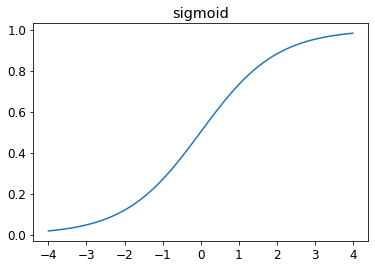

In [47]:
plot_function(torch.sigmoid, title='sigmoid', min=-4, max=4)

In [48]:
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

In [49]:
coll = range(15)
dl = DataLoader(coll, batch_size=5, shuffle=True)
list(dl)

[tensor([ 3, 12,  8, 10,  2]),
 tensor([ 9,  4,  7, 14,  5]),
 tensor([ 1, 13,  0,  6, 11])]

In [50]:
string.ascii_lowercase

'abcdefghijklmnopqrstuvwxyz'

In [51]:
ds = L(enumerate(string.ascii_lowercase))
ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j')...]

In [52]:
dl = DataLoader(ds, batch_size=6, shuffle=True)
list(dl)

[(tensor([17, 18, 10, 22,  8, 14]), ('r', 's', 'k', 'w', 'i', 'o')),
 (tensor([20, 15,  9, 13, 21, 12]), ('u', 'p', 'j', 'n', 'v', 'm')),
 (tensor([ 7, 25,  6,  5, 11, 23]), ('h', 'z', 'g', 'f', 'l', 'x')),
 (tensor([ 1,  3,  0, 24, 19, 16]), ('b', 'd', 'a', 'y', 't', 'q')),
 (tensor([2, 4]), ('c', 'e'))]

In [53]:
# for x, y in dl:
#     pred = model(x)
#     loss = loss_func(pred, y)
#     loss.backward()
#     parameters -= parameters.grad * lr

In [54]:
weights = init_params((28*28, 1))
bias = init_params(1)

In [55]:
dl = DataLoader(dset, batch_size=256)
xb, yb = first(dl)
xb.shape, yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [56]:
valid_dl = DataLoader(valid_dset, batch_size=256)
valid_dl

In [57]:
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [58]:
preds = linear1(batch)
preds

tensor([[-2.1876],
        [-8.3973],
        [ 2.5000],
        [-4.9473]], grad_fn=<AddBackward0>)

In [59]:
loss = mnist_loss(preds, train_y[:4])
loss

tensor(0.7419, grad_fn=<MeanBackward0>)

In [60]:
loss.backward()
weights.grad.shape, weights.grad.mean(), bias.grad

(torch.Size([784, 1]), tensor(-0.0061), tensor([-0.0420]))

In [61]:
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

In [62]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(), bias.grad


(tensor(-0.0121), tensor([-0.0840]))

In [63]:
weights.grad.zero_()
bias.grad.zero_()

tensor([0.])

In [64]:
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds > 0.5) == yb
    return correct.float().mean()

In [65]:
batch_accuracy(linear1(batch), train_y[:4])

tensor(0.2500)

In [66]:
def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb, yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

validate_epoch(linear1)

0.5263

In [67]:
def train_epoch(model, lr, params):
    for xb, yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad*lr
            p.grad.zero_()

In [68]:
lr = 1.
params = weights, bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.6664

In [69]:
for i in range(20):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end='')

0.82660.890.91840.92770.93990.94670.95060.95260.9560.95790.95990.96090.96140.96190.96330.96380.96480.96580.96720.9677

In [70]:
linear_model = nn.Linear(28*28, 1)
w, b = linear_model.parameters()
w.shape, b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [71]:
class BasicOptim:
    def __init__(self, params, lr): self.params, self.lr = list(params), lr

    def step(self, *args, **kwargs):
        for p in self.params: p.data -= p.grad.data * self.lr
    
    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad = None

In [72]:
opt = BasicOptim(linear_model.parameters(), lr)

In [73]:
def train_epoch(model):
    for xb, yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()

In [74]:
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end='')

In [75]:
train_model(linear_model, 20)

0.49320.76860.85550.91360.93460.94820.9570.96340.96580.96780.96970.97170.97360.97460.97610.9770.97750.97750.9780.9785

In [76]:
linear_model = nn.Linear(28*28, 1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)

0.49320.7920.85350.91750.93460.94870.9570.96240.96580.96780.96920.97120.97360.97510.97610.97650.97750.97850.97850.9785

In [77]:
dls = DataLoaders(dl, valid_dl)

In [78]:
learn = Learner(dls, nn.Linear(28*28,1), opt_func=SGD, 
                loss_func=mnist_loss, metrics=batch_accuracy)

In [79]:
learn.fit(10, lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.637115,0.503219,0.495584,00:00
1,0.445805,0.253316,0.770363,00:00
2,0.166994,0.157639,0.858685,00:00
3,0.074791,0.098678,0.916585,00:00
4,0.040750,0.073973,0.934249,00:00
5,0.027397,0.060107,0.948970,00:00
6,0.021867,0.051302,0.957311,00:00
7,0.019372,0.045369,0.963690,00:00
8,0.018076,0.041160,0.965653,00:00
9,0.017278,0.038030,0.967125,00:00


In [80]:
w1 = init_params((28*28, 30))
b1 = init_params(30)
w2 = init_params((30, 1))
b2 = init_params(1)

In [81]:
def simple_net(xb):
    res = xb@w1 + b1
    res = res.max(tensor(0.0))
    res = res@w2 + b2
    return res

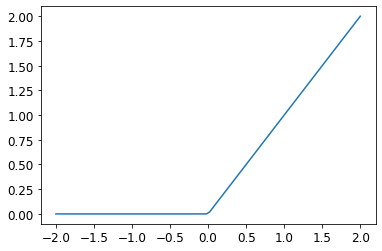

In [82]:
plot_function(F.relu)

In [83]:
simple_net = nn.Sequential(
    nn.Linear(28*28, 30),
    nn.ReLU(),
    nn.Linear(30,1)
)

In [84]:
simple_net

Sequential(
  (0): Linear(in_features=784, out_features=30, bias=True)
  (1): ReLU()
  (2): Linear(in_features=30, out_features=1, bias=True)
)

In [85]:
learn = Learner(dls, simple_net, opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)
learn.fit(40, 0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.367166,0.383046,0.526497,00:00
1,0.165729,0.248736,0.783121,00:00
2,0.088809,0.120123,0.915604,00:00
3,0.056306,0.079175,0.939647,00:00
4,0.041537,0.061235,0.956820,00:00
5,0.034194,0.051376,0.964181,00:00
6,0.030106,0.045240,0.966143,00:00
7,0.027529,0.041078,0.967125,00:00
8,0.025716,0.038067,0.969578,00:00
9,0.024332,0.035780,0.970069,00:00


In [86]:
learn.recorder.values

[(#3) [0.36716559529304504,0.38304638862609863,0.5264965891838074],
 (#3) [0.1657286286354065,0.24873633682727814,0.7831206917762756],
 (#3) [0.08880913257598877,0.12012261897325516,0.915603518486023],
 (#3) [0.05630605295300484,0.07917549461126328,0.9396467208862305],
 (#3) [0.04153737053275108,0.061234984546899796,0.9568204283714294],
 (#3) [0.03419382870197296,0.0513761080801487,0.964180588722229],
 (#3) [0.030106401070952415,0.0452398806810379,0.9661432504653931],
 (#3) [0.02752925269305706,0.04107779264450073,0.9671246409416199],
 (#3) [0.025715820491313934,0.03806688264012337,0.9695780277252197],
 (#3) [0.02433217130601406,0.03577970340847969,0.9700686931610107],
 (#3) [0.023220865055918694,0.03397233784198761,0.9715407490730286],
 (#3) [0.022298112511634827,0.032496776431798935,0.9720314145088196],
 (#3) [0.0215136855840683,0.03126232326030731,0.9739941358566284],
 (#3) [0.020835204049944878,0.030205843970179558,0.9749754667282104],
 (#3) [0.020240899175405502,0.0292844139039516

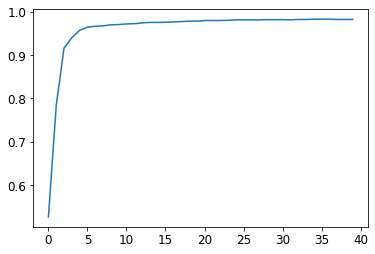

In [87]:
plt.plot(L(learn.recorder.values).itemgot(2))

In [88]:
dls = ImageDataLoaders.from_folder(path)

In [89]:
learn = cnn_learner(dls, resnet18, pretrained=False,
                    loss_func=F.cross_entropy, metrics=accuracy)
learn.fit_one_cycle(1, 0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.065947,0.010219,0.995584,00:25


In [89]:
%cd /content/drive/MyDrive/Colab Notebooks/fastai-practice

!git config --global user.email 'intaek428@gmail.com'
!git config --global user.name 'ITHwang'

!git add .
!git commit -m 'chap4 끄'
!git push